<a href="https://colab.research.google.com/github/Vishal-74/MachineLearningProjects/blob/main/loan_aprooval.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORTING LIBRARIES

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
import joblib
from sklearn.tree import export_graphviz
import graphviz
import numpy as np

In [ ]:
loan_df = pd.read_csv("/content/loan_approval_dataset.csv")

In [ ]:
loan_df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


DROPPING EMPTY ROWS

In [ ]:
loan_df.dropna(inplace=True)

In [ ]:
loan_df.loan_status

NameError: name 'loan_df' is not defined

DRAWING WHOLE STATUS OF LOAN

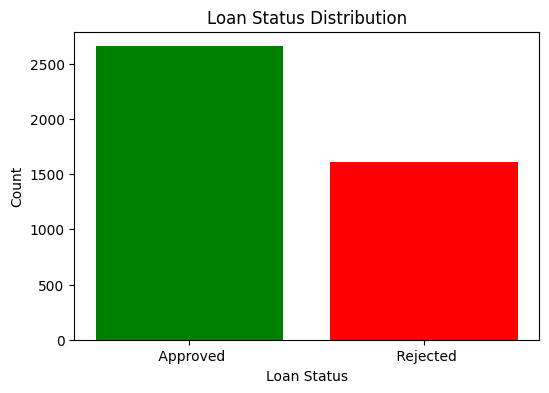

In [ ]:
loan_status_counts = loan_df[' loan_status'].value_counts()

plt.figure(figsize=(6, 4))
plt.bar(loan_status_counts.index, loan_status_counts.values, color=['green', 'red'])
plt.title('Loan Status Distribution')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.show()

DRAWING EDUCATION STATUS

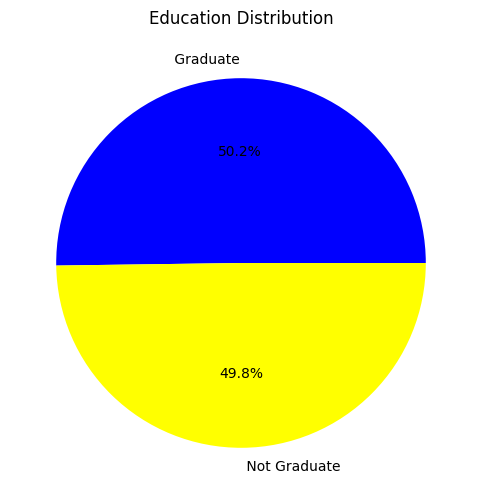

In [ ]:
education_counts = loan_df[' education'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(education_counts, labels=education_counts.index, autopct='%1.1f%%', colors=['blue', 'yellow'])
plt.title('Education Distribution')
plt.show()

DRAWING LOAN STATUS BASED ON EDUCATION

<Figure size 800x600 with 0 Axes>

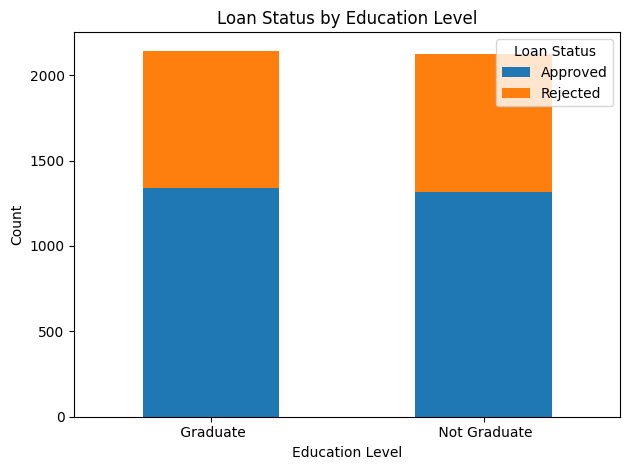

In [ ]:
loan_df.columns = loan_df.columns.str.strip()

if 'education' in loan_df.columns and 'loan_status' in loan_df.columns:

    education_loan_status_counts = loan_df.groupby(['education', 'loan_status']).size().unstack()

    plt.figure(figsize=(8, 6))
    education_loan_status_counts.plot(kind='bar', stacked=True)
    plt.title('Loan Status by Education Level')
    plt.xlabel('Education Level')
    plt.ylabel('Count')
    plt.legend(title='Loan Status', loc='upper right', labels=['Approved', 'Rejected'])
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()

STATUS BASED ON CIBIL SCORE

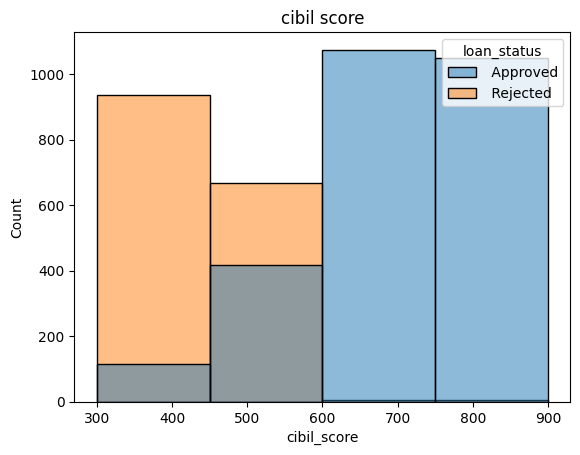

In [ ]:
sns.histplot(data=loan_df,x='cibil_score',bins=4,hue='loan_status')
plt.title('cibil score')
plt.show()

EFFECTS OF DEPENDENT

<Axes: xlabel='no_of_dependents', ylabel='count'>

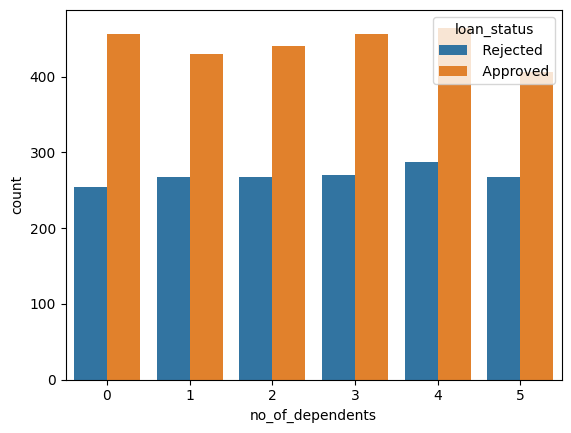

In [ ]:
sns.countplot(x = 'no_of_dependents', data = loan_df, hue = 'loan_status')

EFFECTS OF EMPLOYMENT

In [ ]:
sns.countplot(x='self_employed', data = loan_df, hue = 'education').set_title('Self Employed')

COVERTING CATEGORICAL VALUE TO NUMERICAL VALUE

In [ ]:
label_encoder = LabelEncoder()
loan_df['education_numeric'] = label_encoder.fit_transform(loan_df['education'])
loan_df['self_employed_numeric'] = label_encoder.fit_transform(loan_df['self_employed'])
loan_df['self_employed'] = loan_df['self_employed_numeric']
loan_df['education'] = loan_df['education_numeric']
loan_df.drop('education_numeric', axis=1, inplace=True)
loan_df.drop('self_employed_numeric', axis=1, inplace=True)
loan_df.head()

In [ ]:
print(loan_df.columns)

DEFINING FEATURES

In [ ]:
features = [
    'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value'
]

DEFINING TARGET

In [ ]:
target = 'loan_status'

DEFINING FEATURES IN 'X' AND TARGET IN 'Y'

In [ ]:
X = loan_df[features]
y = loan_df[target]
X.shape

TRAIN TEST SPLIT

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

MODEL TRAINING

In [ ]:
model = RandomForestClassifier(n_estimators=10, random_state=42)
model.fit(X_train, y_train)

PRINT TRAINING SCORE

In [ ]:
print(f"Training Score:{model.score(X_train,y_train)*100}%")

PRINT TESTING SCORE

In [ ]:
print(f"Test score:{model.score(X_test,y_test)*100}%")

IMPORTANCE OF EACH FEATURES

In [ ]:
feature_importances = model.feature_importances_
feature_importances

CUSTOM INPUT / USER INPUT

In [ ]:
def predict_loan_approval():
     # Get input values from the user
     no_of_dependents = int(input("Enter the number of dependents: "))
     education = input("Enter education (0 for Graduate and 1 for Not Graduate): ")
     self_employed = input("Are you self-employed? (1 for Yes and 0 for No): ")
     income_annum = float(input("Enter the annual income: "))
     loan_amount = float(input("Enter the loan amount: "))
     loan_term = int(input("Enter the loan term (in months): "))
     cibil_score = int(input("Enter the CIBIL score: "))
     residential_assets_value = float(input("Enter the residential assets value: "))
     commercial_assets_value = float(input("Enter the commercial assets value: "))
     luxury_assets_value = float(input("Enter the luxury assets value: "))
     bank_asset_value = float(input("Enter the bank asset value: "))

     # Create a DataFrame for the user input
     user_data = pd.DataFrame(
         [[no_of_dependents, education, self_employed, income_annum, loan_amount, loan_term, cibil_score,
           residential_assets_value, commercial_assets_value, luxury_assets_value, bank_asset_value]],
         columns=['no_of_dependents', 'education', 'self_employed',
        'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
        'residential_assets_value', 'commercial_assets_value',
        'luxury_assets_value', 'bank_asset_value',]
     )


     # Make prediction
     prediction = model.predict(user_data)[0]

     print(f"\nLoan Approval Prediction: {prediction}")

predict_loan_approval()